In [7]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [8]:
# import csv file
df = pd.read_csv('Sales Data.csv', encoding= 'unicode_escape')

In [9]:
df.shape

(11251, 15)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [13]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [14]:
# drop null values
df.dropna(inplace=True)

In [15]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int32')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
# use describe() method returns description of data in the Dataframs (e.g, count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

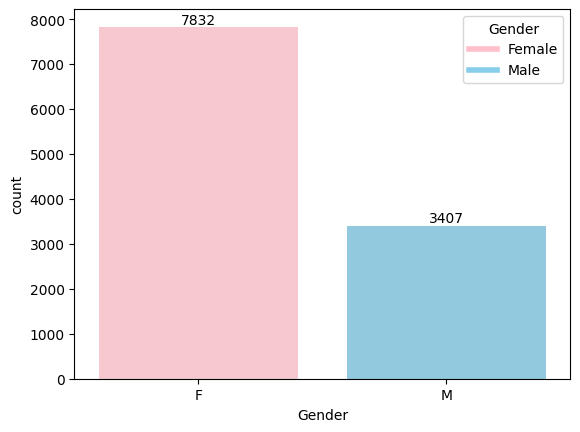

In [20]:
# plotting a bar chart for Gender and it's count
colors = {'Female': 'pink', 'Male': 'skyblue'}

# Plot the countplot with custom colors
ax = sns.countplot(x='Gender', data=df, hue='Gender', palette=colors.values(), legend=False)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set custom colors for legend
legend_labels = [plt.Line2D([0], [0], color=colors[gender], lw=4) for gender in colors.keys()]
ax.legend(legend_labels, colors.keys(), title='Gender')

# Show the plot
plt.show()

*From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

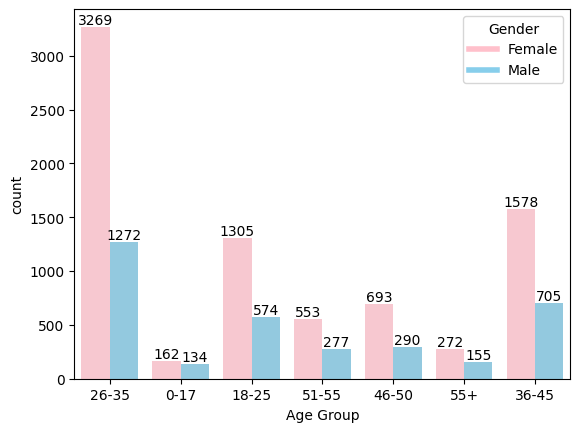

In [21]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette=colors.values(), legend=False)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Set custom colors for legend
legend_labels = [plt.Line2D([0], [0], color=colors[gender], lw=4) for gender in colors.keys()]
ax.legend(legend_labels, colors.keys(), title='Gender')

# Show the plot
plt.show()

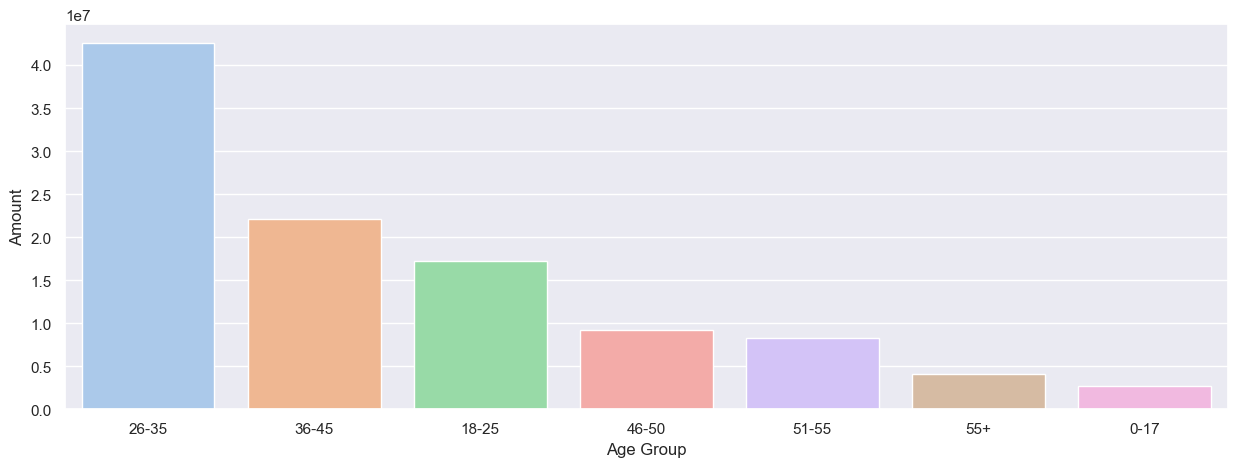

In [25]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

light_palette = sns.color_palette("pastel", n_colors=len(sales_age))

# Plot the bar graph
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Age Group', y='Amount', hue='Age Group', data=sales_age, palette=light_palette, legend=False)

# Show the plot
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

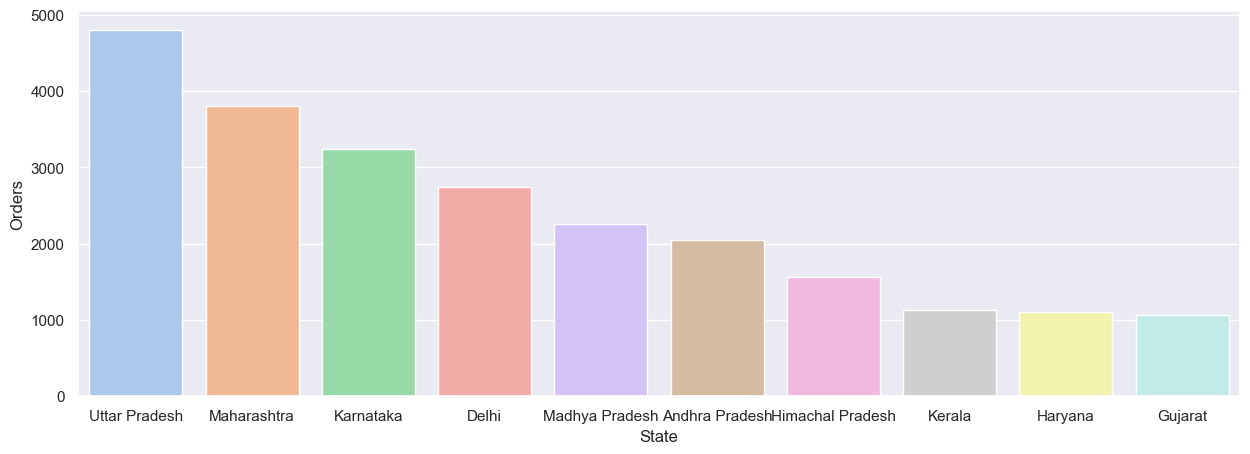

In [27]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

light_palette = sns.color_palette("pastel", n_colors=len(sales_state))

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', hue = 'State', palette=light_palette, legend=False)

# Show the plot
plt.show()

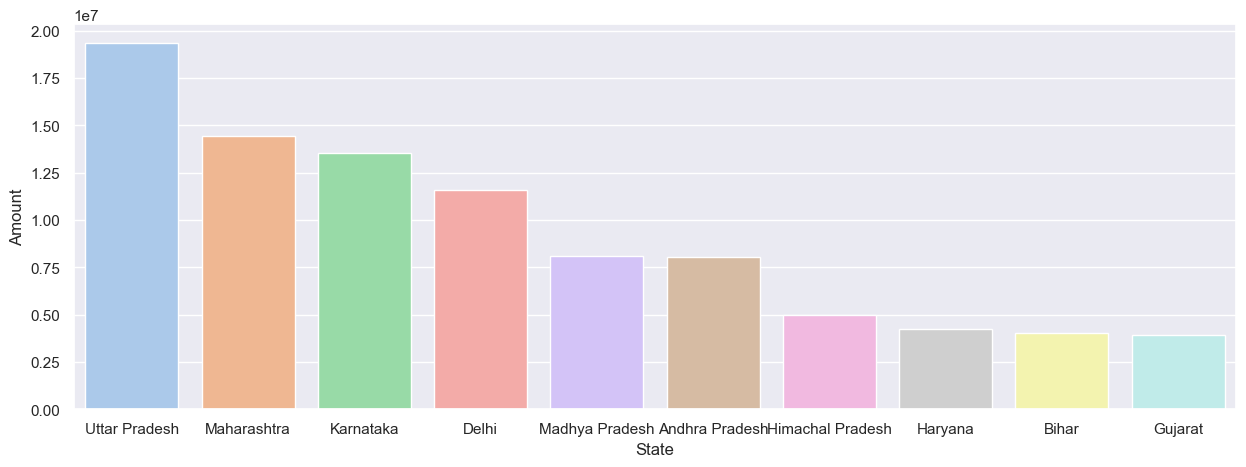

In [28]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue = 'State', palette=light_palette, legend=False)

# Show the plot
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

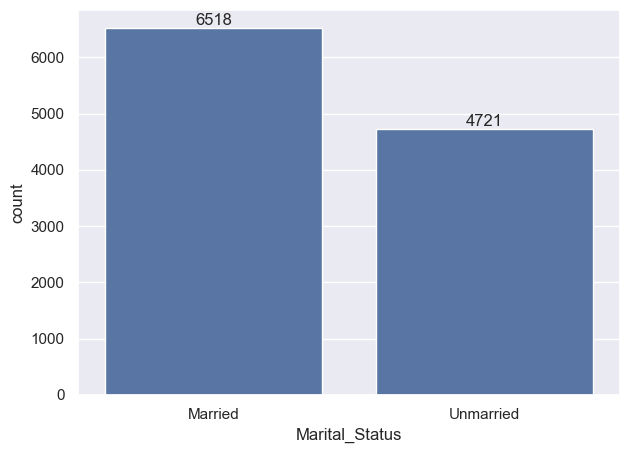

In [41]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)
    
# Set custom labels for married and unmarried
ax.set_xticks([0, 1])  # Assuming 'Married' is at index 0 and 'Unmarried' is at index 1
ax.set_xticklabels(['Married', 'Unmarried'])

# Show the plot
plt.show()

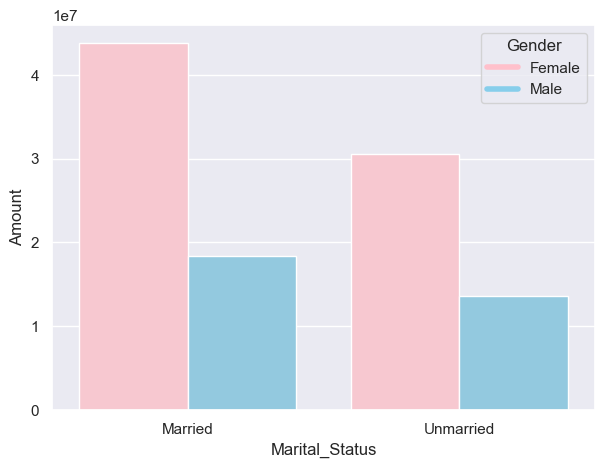

In [55]:
# Group by 'Marital_Status', 'Gender', and calculate total amount
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Plot the bar graph with custom colors
sns.set(rc={'figure.figsize': (7, 5)})
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', palette=colors.values(), legend=False)

# Set custom colors for legend
legend_labels = [plt.Line2D([0], [0], color=colors[gender], lw=4) for gender in colors.keys()]
ax.legend(legend_labels, colors.keys(), title='Gender')

# Set custom labels for married and unmarried
ax.set_xticks([0, 1])  # Assuming 'Married' is at index 0 and 'Unmarried' is at index 1
ax.set_xticklabels(['Married', 'Unmarried'])

# Show the plot
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

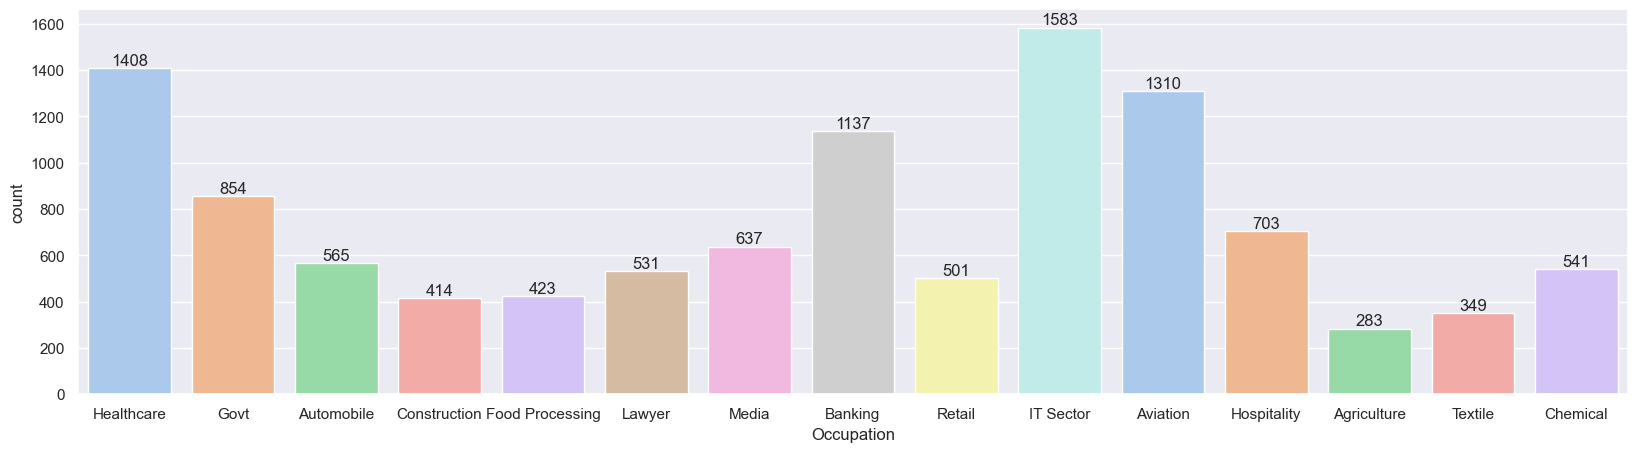

In [83]:
light_palette = sns.color_palette("pastel", n_colors=len(df['Occupation'].unique()))

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation', palette=light_palette, legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

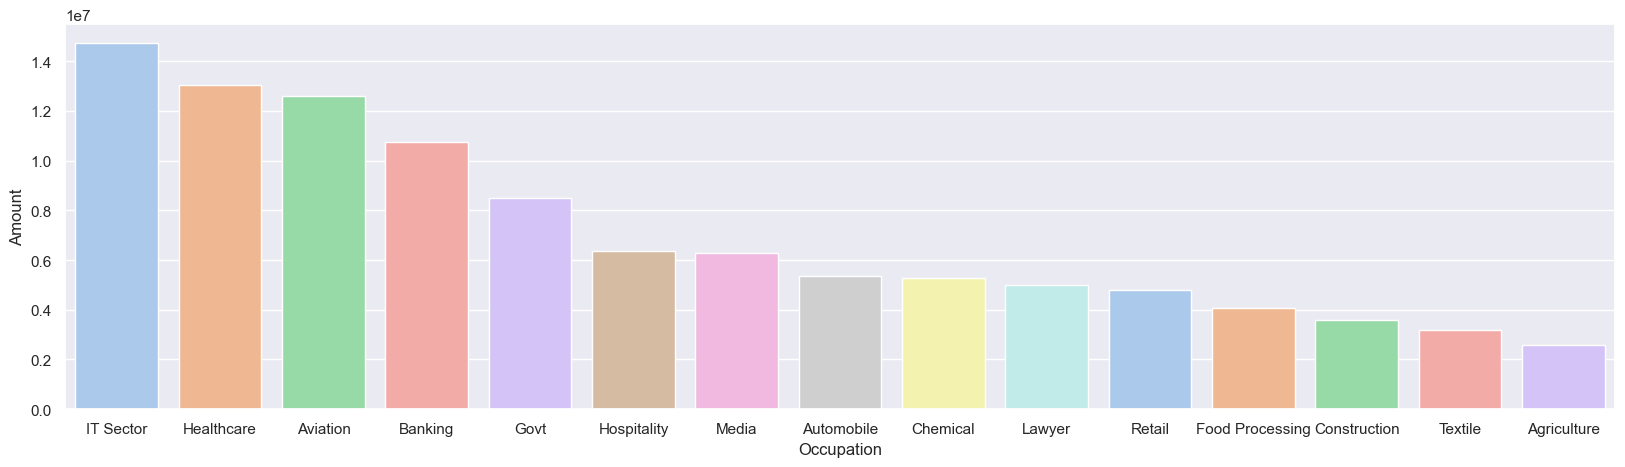

In [84]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', hue = 'Occupation', palette=light_palette, legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

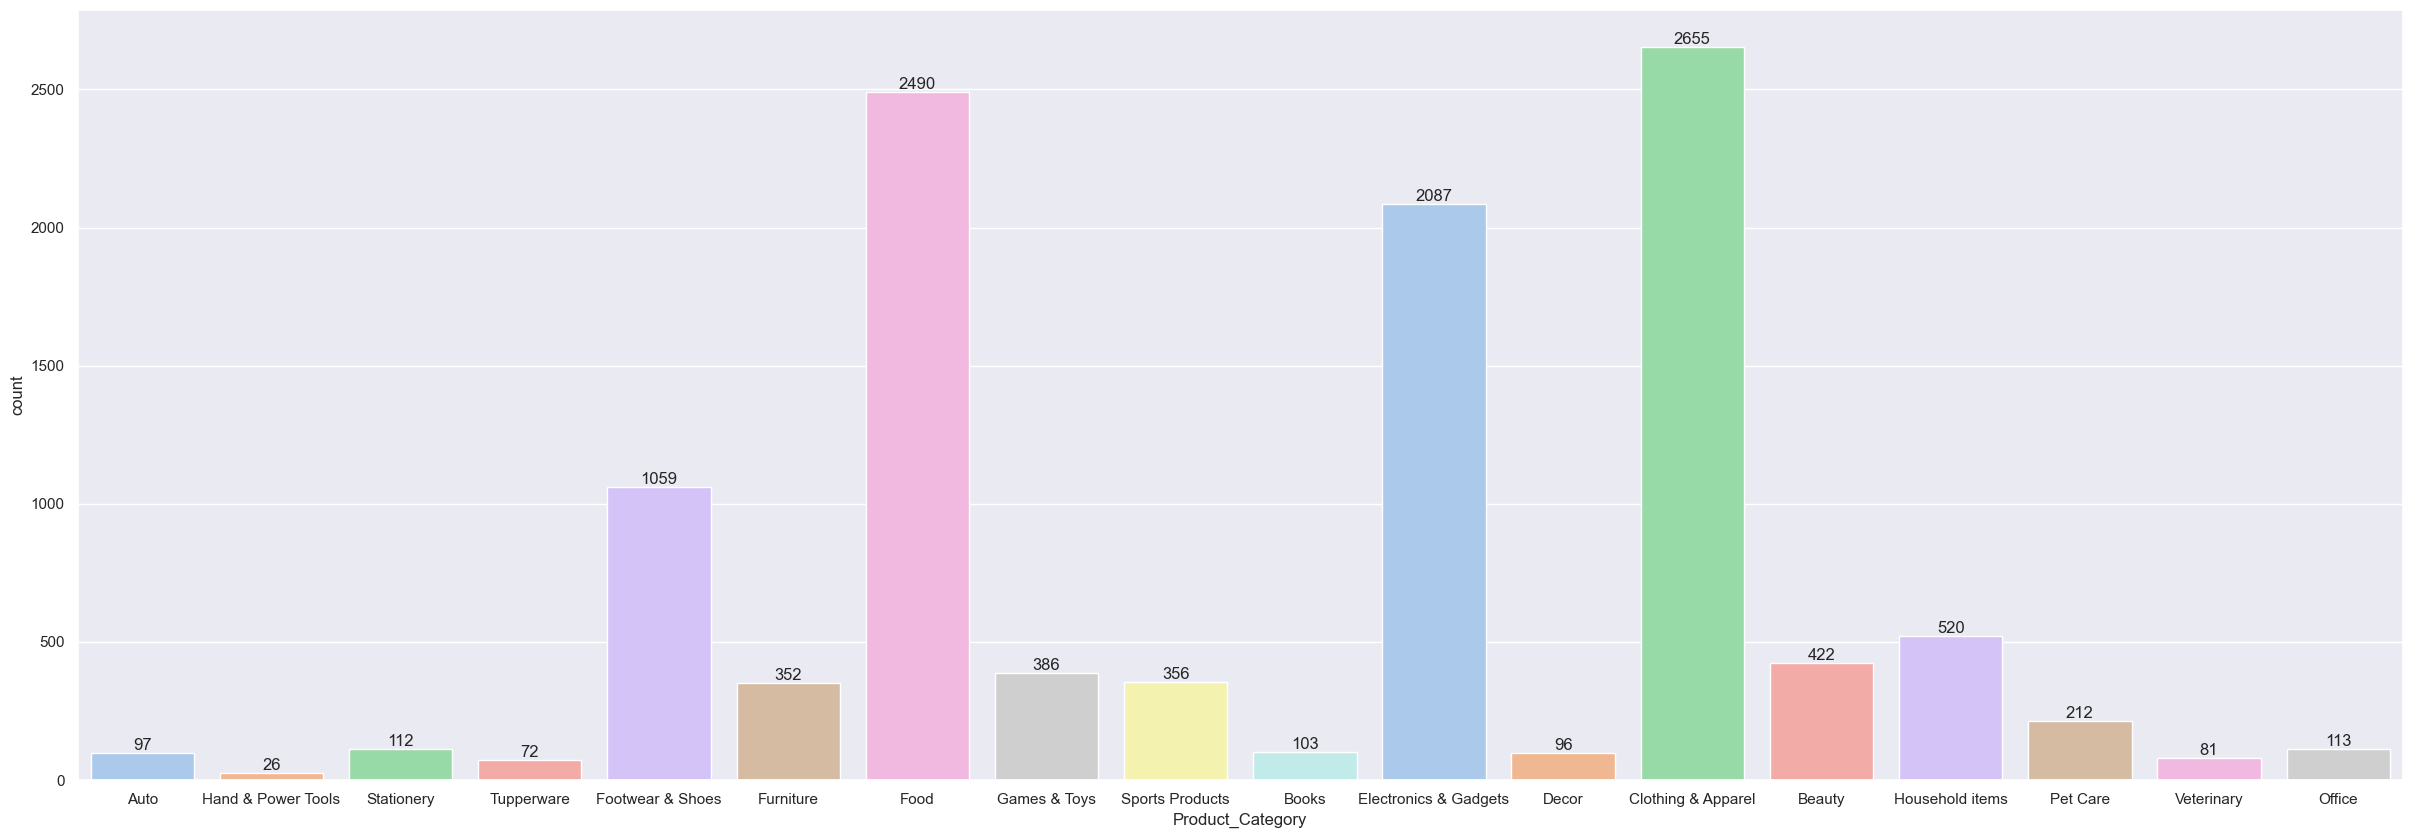

In [92]:
light_palette = sns.color_palette("pastel", n_colors=len(df['Product_Category'].unique()))

sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category', palette=light_palette, legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

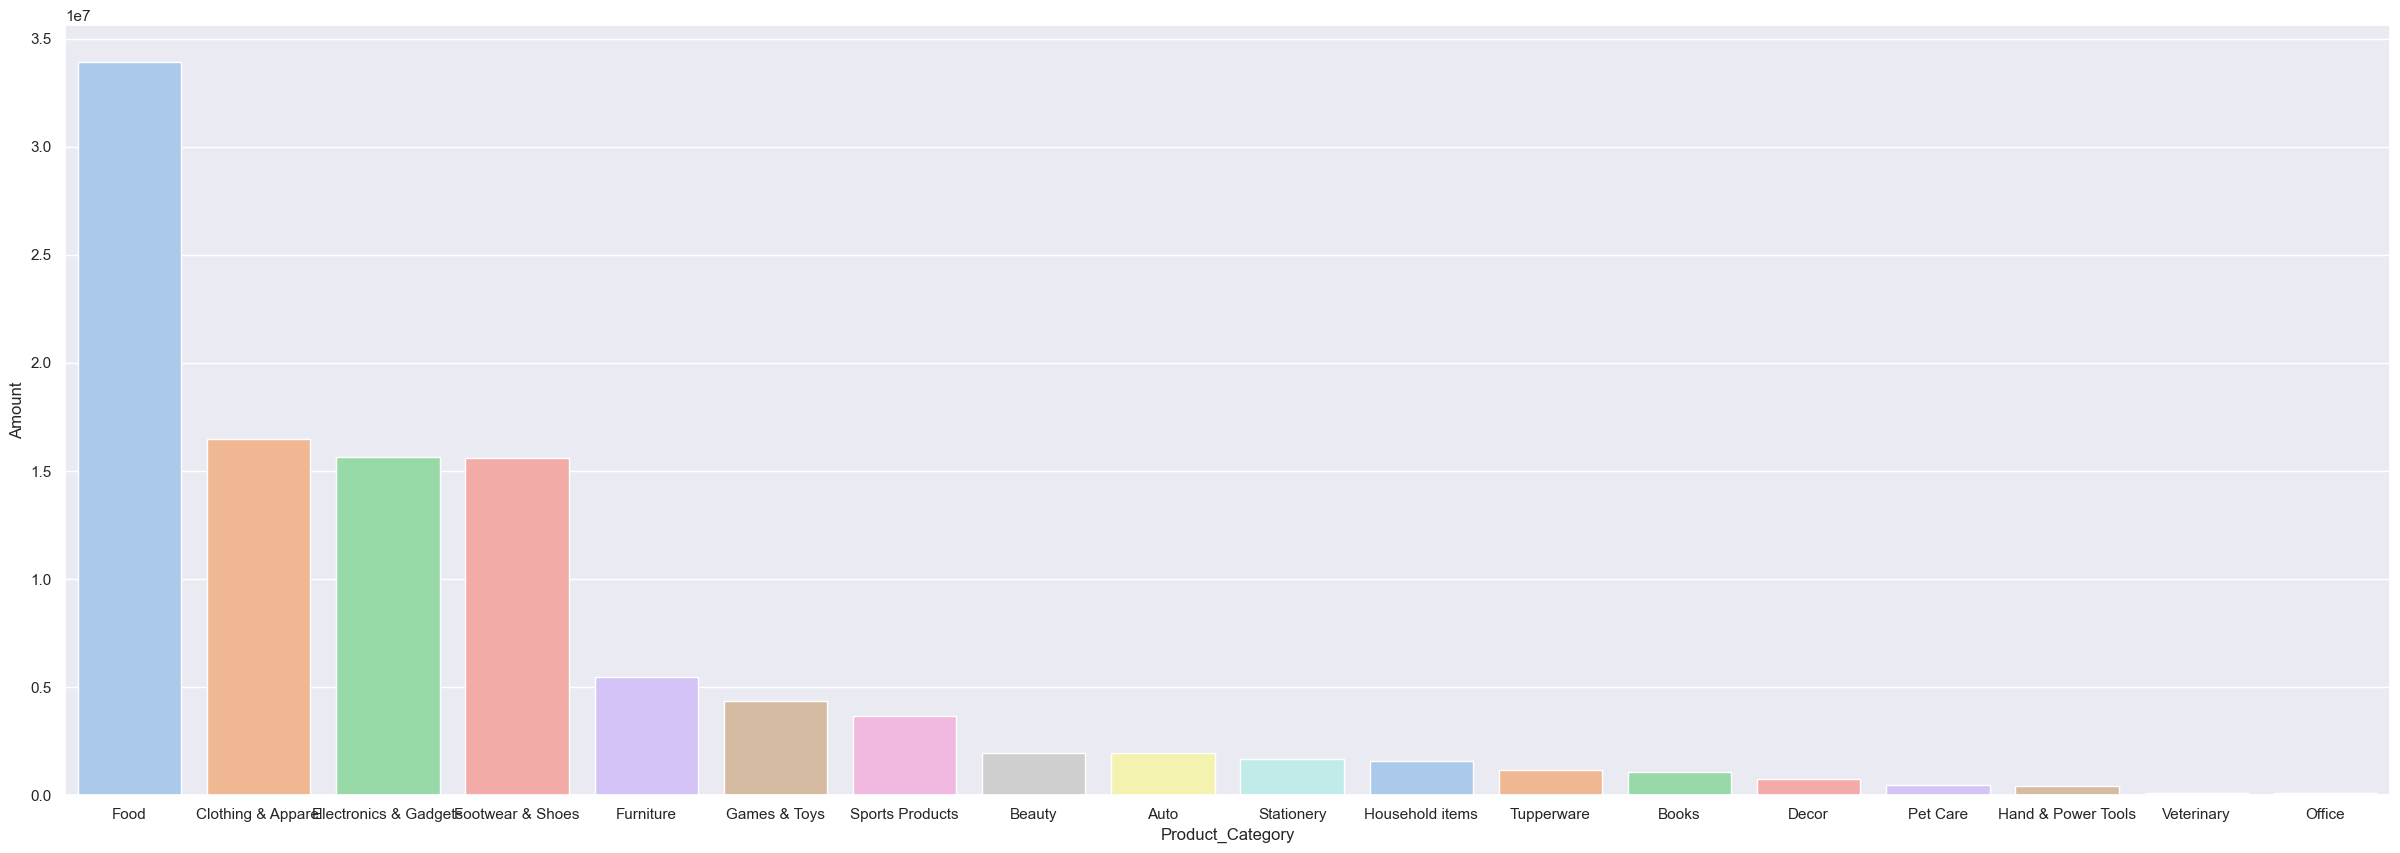

In [90]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', hue = 'Product_Category', palette=light_palette, legend=False)

# Show the plot
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

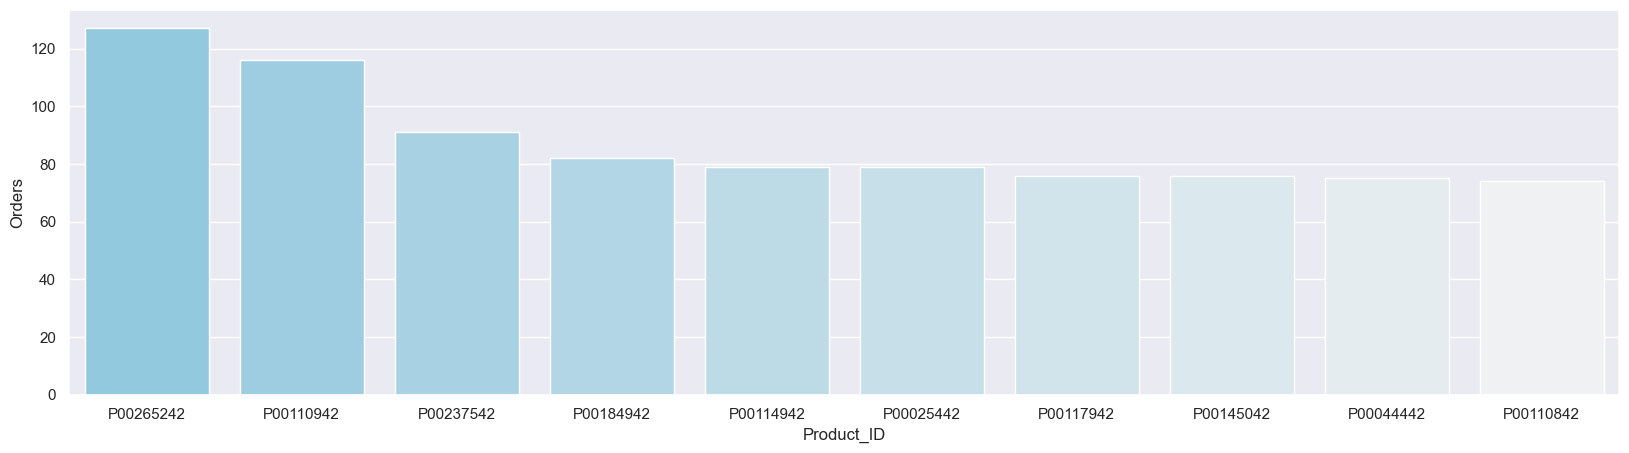

In [106]:
# top 10 most sold products
blue_palette = sns.light_palette("skyblue", n_colors=10, reverse=True)

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', hue = 'Product_ID', palette=blue_palette, legend=False)

# Show the plot
plt.show()

## Conclusion:
*The project's findings indicate that married women aged 26-35 years, residing in Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation sectors, are more likely to purchase products from Food, Clothing, and Electronics categories. These insights can inform targeted marketing strategies and inventory planning to enhance customer experience and increase sales.*